In [9]:
pip install numpy pandas matplotlib seaborn
# numpy: Xử lý mảng số học và tính toán hiệu quả.
# pandas: Quản lý và phân tích dữ liệu dạng bảng (DataFrame).
# matplotlib: Vẽ biểu đồ cơ bản.
# seaborn: Vẽ biểu đồ nâng cao và hỗ trợ trực quan hóa dữ liệu.

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scipy scikit-learn statsmodels plotly
# scipy: Hỗ trợ các phép toán khoa học, tối ưu hóa, và thống kê.
# scikit-learn: Xây dựng mô hình học máy (machine learning).
# statsmodels: Phân tích thống kê và mô hình hóa dữ liệu.
# plotly: Vẽ biểu đồ tương tác.

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install dask pyspark
# dask: Xử lý dữ liệu lớn với cấu trúc giống Pandas.
# pyspark: Xử lý dữ liệu phân tán với Apache Spark.

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = "bike_data.csv";
df = pd.read_csv(file);
print(df);

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  count  
0      14.395        81     0.0000     16  
1      13.6

In [9]:
# kiểm tra tổng số dữ liệu null
missing_per_column = df.isnull().sum();
print(missing_per_column);

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64


In [5]:
a = df.describe();
print(a)

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      23.655084     61.886460     12.799395    191.574132  
std        8.474601     19.245033      8.164537    181.144454  
min        0.760000      0.000000      0.

In [5]:
# Chuyển đổi cột 'datetime' sang định dạng datetime
df['datetime'] = pd.to_datetime(df['datetime']);

df['year'] = df['datetime'].dt.year;
df['month'] = df['datetime'].dt.month;
df['day'] = df['datetime'].dt.day;
df['hour'] = df['datetime'].dt.hour;
df['day_of_week'] = df['datetime'].dt.dayofweek;

df = df.drop(columns=['datetime', 'year', 'month', 'day']);

print("Dữ liệu sau khi tiền xử lý:");
print(df);

Dữ liệu sau khi tiền xử lý:
       season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  count  hour  day_of_week  
0         0.0000     16     0            5  
1         0.0000 

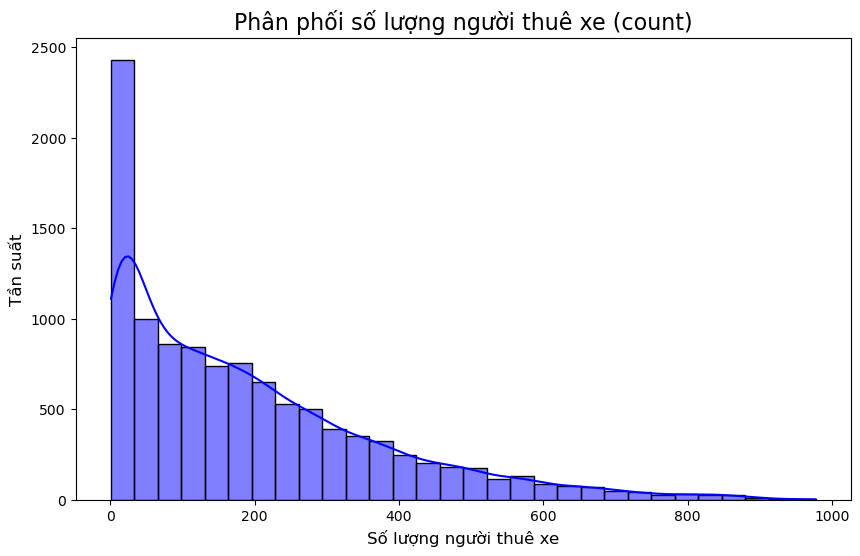

In [21]:
plt.figure(figsize=(10, 6));
sns.histplot(df['count'], bins=30, kde=True, color="blue");
plt.title("Phân phối số lượng người thuê xe (count)", fontsize=16);
plt.xlabel("Số lượng người thuê xe", fontsize=12);
plt.ylabel("Tần suất", fontsize=12);
plt.show();

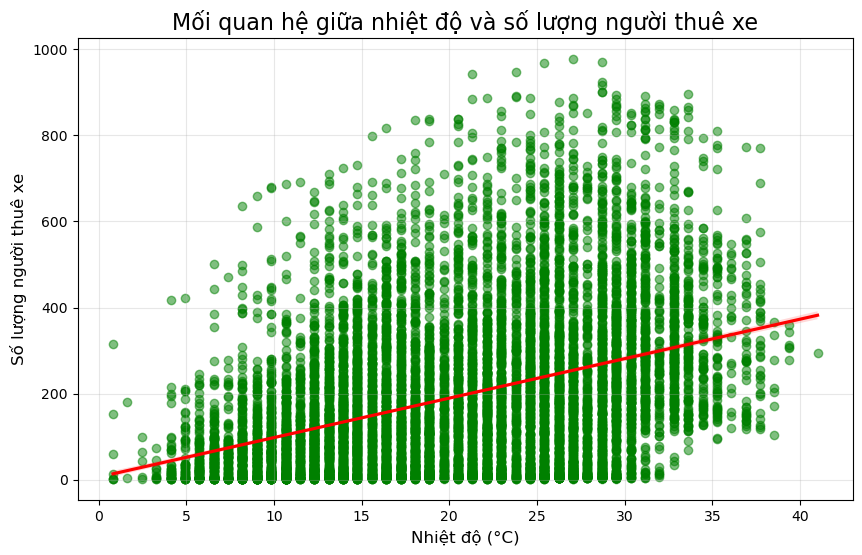

In [9]:
# # 2. Mối quan hệ giữa nhiệt độ và số lượng người thuê xe
plt.figure(figsize=(10, 6));
sns.regplot(x=df['temp'], y=df['count'], scatter_kws={'alpha': 0.5, 'color': 'green'}, line_kws={'color': 'red'});
plt.title("Mối quan hệ giữa nhiệt độ và số lượng người thuê xe", fontsize=16);
plt.xlabel("Nhiệt độ (°C)", fontsize=12);
plt.ylabel("Số lượng người thuê xe", fontsize=12);
plt.grid(alpha=0.3);
plt.show();

In [23]:
# thống kê theo mùa
total_by_season = df.groupby('season')['count'].sum();
print(total_by_season);

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64


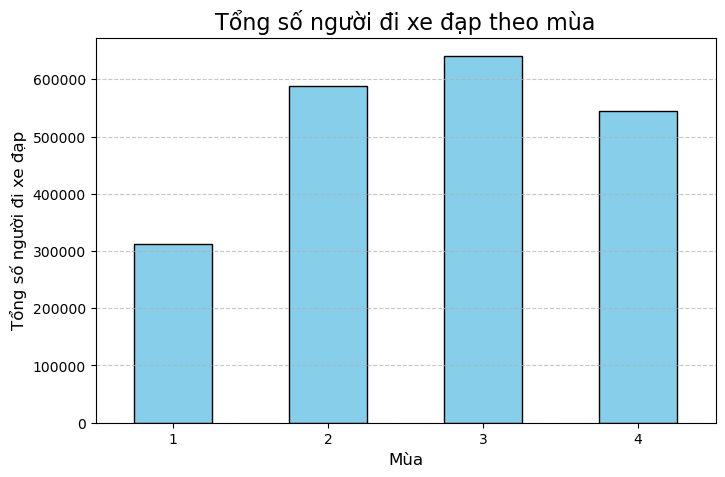

In [11]:
# biểu đồ cột
plt.figure(figsize=(8, 5));
total_by_season.plot(kind='bar', color='skyblue', edgecolor='black');

plt.title('Tổng số người đi xe đạp theo mùa', fontsize=16);
plt.xlabel('Mùa', fontsize=12);
plt.ylabel('Tổng số người đi xe đạp', fontsize=12);
plt.xticks(rotation=0)  # Xoay trục X;
plt.grid(axis='y', linestyle='--', alpha=0.7);

plt.show();

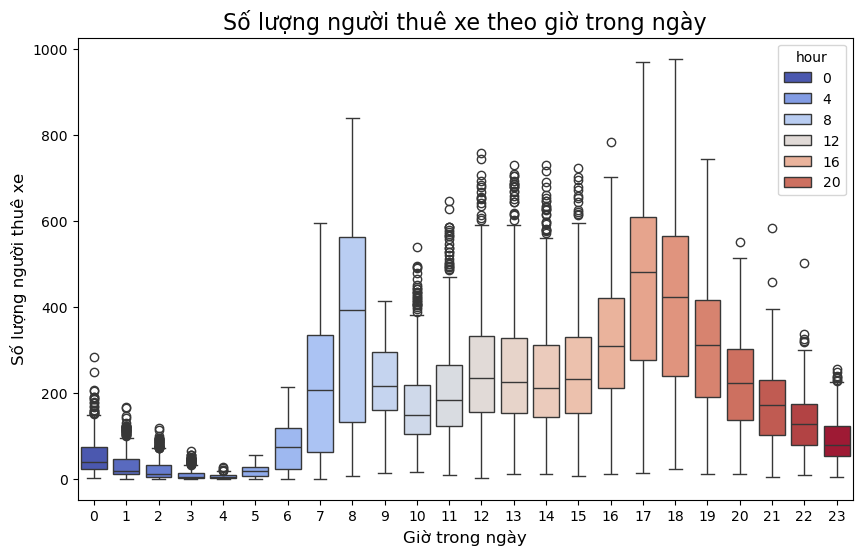

In [71]:
# 3. Số lượng người thuê xe theo giờ trong ngày
plt.figure(figsize=(10, 6));
sns.boxplot(x=df['hour'], y=df['count'], hue=df['hour'], palette = 'coolwarm');
plt.title("Số lượng người thuê xe theo giờ trong ngày", fontsize=16);
plt.xlabel("Giờ trong ngày", fontsize=12);
plt.ylabel("Số lượng người thuê xe", fontsize=12);
plt.show();


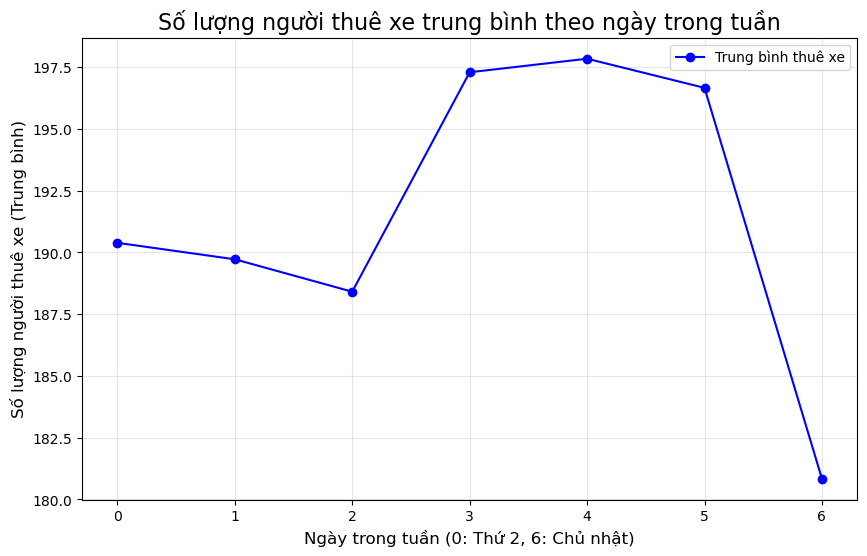

In [78]:
# # 4. Số lượng người thuê xe theo ngày trong tuần
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=df['day_of_week'], y=df['count'], hue=df['day_of_week'], palette = 'viridis')
# plt.title("Số lượng người thuê xe theo ngày trong tuần", fontsize=16)
# plt.xlabel("Ngày trong tuần (0: Thứ 2, 6: Chủ nhật)", fontsize=12)
# plt.ylabel("Số lượng người thuê xe", fontsize=12)
# plt.show()

# Số lượng thuê xe trung bình theo ngày
mean_by_day = df.groupby('day_of_week')['count'].mean();
plt.figure(figsize=(10, 6));
plt.plot(mean_by_day.index, mean_by_day.values, marker='o', linestyle='-', color='b', label='Trung bình thuê xe');
plt.title("Số lượng người thuê xe trung bình theo ngày trong tuần", fontsize=16);
plt.xlabel("Ngày trong tuần (0: Thứ 2, 6: Chủ nhật)", fontsize=12);
plt.ylabel("Số lượng người thuê xe (Trung bình)", fontsize=12);
plt.grid(alpha=0.3);
plt.legend();
plt.show();

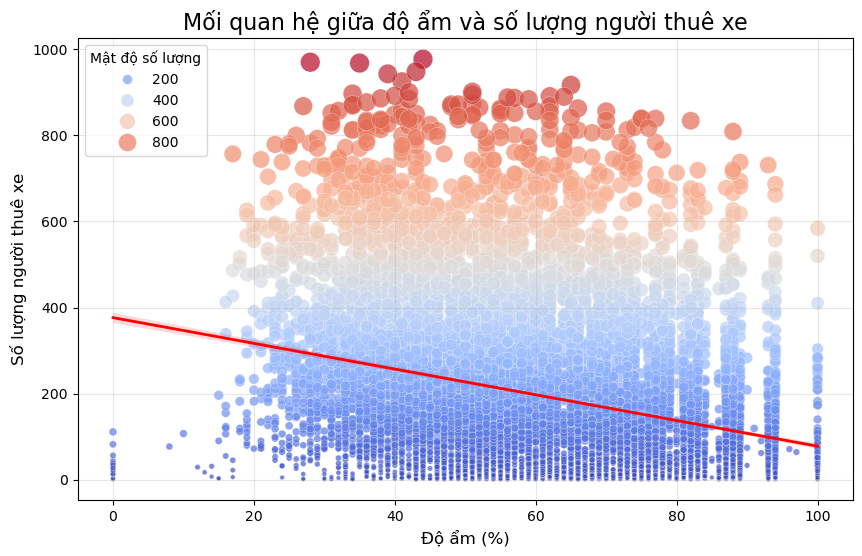

In [37]:
plt.figure(figsize=(10, 6))
# Sử dụng scatterplot với độ đậm của màu để phản ánh mật độ dữ liệu
sns.scatterplot(x=df['humidity'], y=df['count'], hue=df['count'], palette="coolwarm", alpha=0.7, size=df['count'], sizes=(10, 200));
# đường hồi quy 
sns.regplot(x=df['humidity'], y=df['count'], scatter=False, color="red", line_kws={"linewidth": 2, "linestyle": "-"});

plt.title("Mối quan hệ giữa độ ẩm và số lượng người thuê xe", fontsize=16);
plt.xlabel("Độ ẩm (%)", fontsize=12);
plt.ylabel("Số lượng người thuê xe", fontsize=12);
plt.legend(title="Mật độ số lượng");
plt.grid(alpha=0.3);
plt.show();


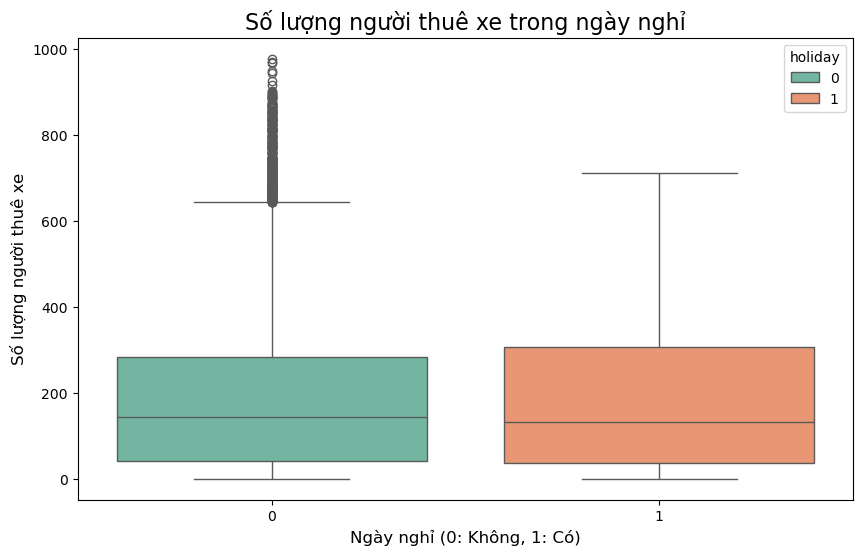

In [84]:
# 8. Số lượng thuê xe trong ngày nghỉ (holiday)
plt.figure(figsize=(10, 6));
sns.boxplot(x=df['holiday'], y=df['count'], hue=df['holiday'], palette = 'Set2');
plt.title("Số lượng người thuê xe trong ngày nghỉ", fontsize=16);
plt.xlabel("Ngày nghỉ (0: Không, 1: Có)", fontsize=12);
plt.ylabel("Số lượng người thuê xe", fontsize=12);
plt.show();


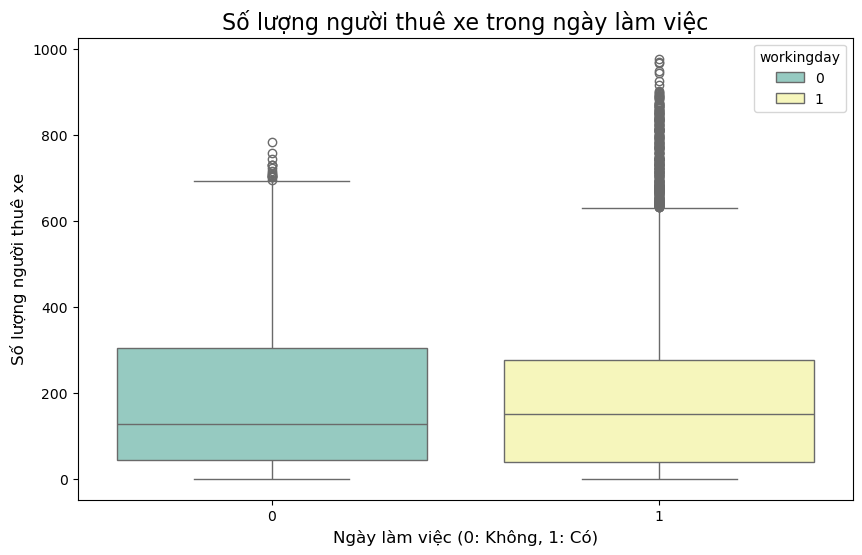

In [86]:
# 9. Số lượng thuê xe trong ngày làm việc (workingday)
plt.figure(figsize=(10, 6));
sns.boxplot(x=df['workingday'], y=df['count'], hue = df['workingday'], palette="Set3");
plt.title("Số lượng người thuê xe trong ngày làm việc", fontsize=16);
plt.xlabel("Ngày làm việc (0: Không, 1: Có)", fontsize=12);
plt.ylabel("Số lượng người thuê xe", fontsize=12);
plt.show();

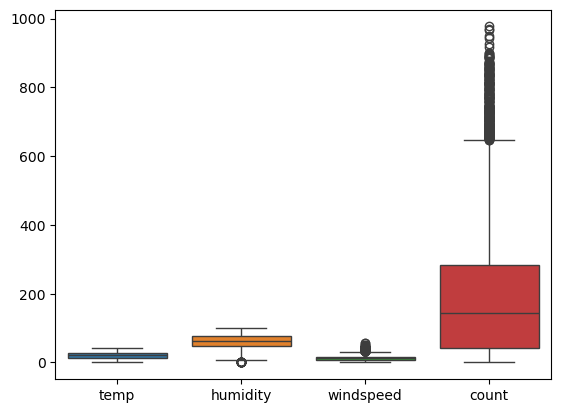

In [11]:
sns.boxplot(data=df[['temp', 'humidity', 'windspeed', 'count']])
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
        'hour']];
y = df['count'];

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42);

# mô hình Linear Regression
model = LinearRegression();
model.fit(X_train, y_train);

# Dự đoán 
y_pred = model.predict(X_test);

# Đánh giá hiệu suất 
rmse = np.sqrt(mean_squared_error(y_test, y_pred)); #sai số giữa giá trị dự đoán và giá trị thực tế

mae = mean_absolute_error(y_test, y_pred); # đồ lệch trung bình giữa dự đoán và thực tế

r2 = r2_score(y_test, y_pred);
# R² = 1: Mô hình hoàn hảo, mọi dự đoán đều trùng khớp với giá trị thực tế.
# R² = 0: Mô hình không tốt hơn việc dự đoán trung bình của dữ liệu.
# R² < 0: Mô hình tệ đến mức dự đoán còn sai lệch hơn khi bạn chỉ sử dụng giá trị trung bình của dữ liệu.

mape = np.mean(np.abs((y_test - y_pred) / (y_test))) * 100;
accuracy = 100 - mape;

print("Hiệu suất của mô hình Linear Regression:");
print(f"Sai số trung bình giữa dự đoán và thực tế: {rmse}");
print(f"Độ lệch trung bình giữ dự đoán và thực tế: {mae}");
print(f"Hệ số xác định: {r2}");
print(f"Tỉ lệ sai số % trung bình giữa thực tế và dự đoán: {mape}%");
print(f"Tỉ lệ chính xác của mô hình: {accuracy}%");


Hiệu suất của mô hình Linear Regression:
Sai số trung bình giữa dự đoán và thực tế: 147.39047205512358
Độ lệch trung bình giữ dự đoán và thực tế: 107.78902531382482
Hệ số xác định: 0.34183677814080815
Tỉ lệ sai số % trung bình giữa thực tế và dự đoán: 316.6574070450797%
Tỉ lệ chính xác của mô hình: -216.6574070450797%


In [61]:
from sklearn.ensemble import RandomForestRegressor
# lập nhiều cây quyết định rồi tính giá trị trung bình

rf_model = RandomForestRegressor(random_state=42);
rf_model.fit(X_train, y_train);
y_pred_rf = rf_model.predict(X_test);

#phần trăm chính xác
mape = np.mean(np.abs((y_test - y_pred_rf) / (y_test))) * 100;
accuracy = 100 - mape;

print("R² của Random Forest:", r2_score(y_test, y_pred_rf));
print(f"Tỉ lệ sai số % trung bình giữa thực tế và dự đoán: {mape}%");
print(f"Tỉ lệ chính xác của mô hình: {accuracy}%");


R² của Random Forest: 0.8518528590118515
Tỉ lệ sai số % trung bình giữa thực tế và dự đoán: 43.66037872982652%
Tỉ lệ chính xác của mô hình: 56.33962127017348%


In [59]:
new_data = pd.DataFrame({
    'season': [3, 2, 4, 1],
    'holiday': [0, 1, 1, 0],
    'workingday': [1, 0, 1, 1],
    'weather': [2, 1, 3, 4],
    'temp': [22.5, 30.0, 25.5, 18.5],
    'atemp': [25.0, 32.0, 23, 15],
    'humidity': [55, 40, 45, 30],
    'windspeed': [12.5, 8.0, 5.0, 10.5],
    'hour': [14, 10, 18, 19]
});

# new_predictions = rf_model.predict(new_data.values);

new_predictions = rf_model.predict(new_data);

print("Dự đoán lượng xe đạp:", new_predictions);

Dự đoán lượng xe đạp: [199.04 380.97 591.65 237.07]
